# **OLYMPIC CAPSTON PROJECT** 

### Introduction of capston project

The dataset tracks the olympic sport and there are many country are contribute .  

In this project we are going to address certain question using python and PySpark.

There are 8018 records and 10 variable
1. Name:- Name of Sport Persone
2. Age:-  Age of Sport Persone
3. Country 
4. Year :- olympic year
5. Date_given:- date won the medal
6. sports
7. gold_medal
8. silver_medal 
9. bronze_medal
10. total_medal


## **Python and DS**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # missing value
%matplotlib inline
plt.style.use('dark_background')

In [4]:
olympic = pd.read_csv("/content/olympic.csv")
olympic

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,8/12/2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10/1/2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10/1/2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10/1/2000,Archery,0,0,1,1


In [5]:
olympic.shape

(8618, 10)

In [6]:
olympic.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,8/12/2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10/1/2000,Gymnastics,2,1,3,6


In [7]:
olympic.tail()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10/1/2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10/1/2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10/1/2000,Archery,0,0,1,1


### Identify variables

In [8]:
olympic.dtypes# data types

name             object
age             float64
country          object
year              int64
Date_Given       object
sports           object
gold_medal        int64
silver_medal      int64
brone_medal       int64
total_medal       int64
dtype: object

In [9]:
olympic['Date_Given']=olympic['Date_Given'].str.replace('/','-')#inconsistent date so bring in single format
olympic['Date_Given'] = olympic['Date_Given'].astype('datetime64[ns]')# changing to appriopate data types
olympic['year'] = olympic['year'].astype('category')# changing to appriopate data types
olympic['country'] = olympic['country'].astype('category')# changing to appriopate data types
olympic['sports'] = olympic['sports'].astype('category')# changing to appriopate data types

In [10]:
olympic.dtypes# data types

name                    object
age                    float64
country               category
year                  category
Date_Given      datetime64[ns]
sports                category
gold_medal               int64
silver_medal             int64
brone_medal              int64
total_medal              int64
dtype: object

#**1. Please do the basic exploration of the data.**

###**Missing Value in Dataset**

In [11]:
print("Number of missing value in dataset")
olympic.isnull().sum()#sum of missing value

Number of missing value in dataset


name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

See that all the null values in the dataset are in the column – name, age.

##Duplicate Value in DataSet

In [12]:
print("Number of duplicated value in dataset")
olympic.duplicated().sum()#sum of duplicated value

Number of duplicated value in dataset


3

3 duplicate values.

### Dividing DataSet Based on Winter and Summer (for exploration purpose)

In [13]:
df1=olympic.copy(deep=True)

In [14]:
df1['month'] = df1['Date_Given'].dt.month# extracting month because winter olympic occur on februry 
df1['season'] = np.where(df1['month']== 2, 'winter', 'summer')# new column based on condition

In [15]:
summer=df1[df1['season']=='summer']# filter dataset
winter=df1[df1['season']=='winter']# filter dataset

In [16]:
def summer_olympic(year):# filter dataset baed on year
    return summer[summer['year']==year]

## **Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.**

In [17]:
summer_2000=summer_olympic(2000)
summer_2004=summer_olympic(2004)
summer_2008=summer_olympic(2008)
summer_2012=summer_olympic(2012)
print('olympic:' ,'Skewness_of_Age', 'Dimensions','Missing Values')
print('summer      :',summer['age'].skew().round(1),summer.shape,summer['age'].isnull().sum())
print('summer 2000 :',summer_2000['age'].skew().round(1),summer_2000.shape,summer_2000['age'].isnull().sum())
print('summer 2004 :',summer_2004['age'].skew().round(1),summer_2004.shape,summer_2004['age'].isnull().sum())
print('summer 2008 :',summer_2008['age'].skew().round(1),summer_2008.shape,summer_2008['age'].isnull().sum())
print('summer 2012 :',summer_2012['age'].skew().round(1),summer_2012.shape,summer_2012['age'].isnull().sum())

olympic: Skewness_of_Age Dimensions Missing Values
summer      : 0.9 (7327, 12) 5
summer 2000 : 0.8 (1840, 12) 0
summer 2004 : 0.8 (1839, 12) 0
summer 2008 : 1.1 (1872, 12) 0
summer 2012 : 1.1 (1776, 12) 5


We can see that all missing values are present in 2012 summer olympic games.Also this is one of event where overall Skewness is greater as compare to other.SO, if we somehow know the reason , we can deal missing value and skewneww effectively.

In [18]:
olympic.index[olympic.isnull().any(axis=1)]# null values in dataset based filter 

Int64Index([1428, 1429, 1430, 4485, 4486], dtype='int64')

### Observation :
we can see that indexes at which missing value present in dataset.Lets check it.

Index= [1428, 1429, 1430, 4485, 4486]

In [19]:
olympic[1428:1431]#Indexes at which missing values are present

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1


In [20]:
olympic[4485:4487]#Indexes at which missing values are present

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [21]:
olympic=olympic.dropna()# removing null values

##Observation:
So we can see that missing value basically present in sports game. Both name and row are absent we can not able to identify it even if we try to impute missing value present in age column.I going to just drop this value.

## **Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.**

In [22]:
summer_2012[summer_2012['country']=='Argentina']

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,month,season
1808,Sebastian Crismanich,25.0,Argentina,2012,2012-08-12,Taekwondo,1,0,0,1,8,summer
1921,Juan Martín del Potro,23.0,Argentina,2012,2012-08-12,Tennis,0,0,1,1,8,summer
2944,Lucas Calabrese,25.0,Argentina,2012,2012-08-12,Sailing,0,0,1,1,8,summer
2947,Juan de la Fuente,35.0,Argentina,2012,2012-08-12,Sailing,0,0,1,1,8,summer
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4488,Lucha Aymar,34.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4493,Noel Barrionuevo,28.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4498,Martina Cavallero,22.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4501,Silvina D'Elia,26.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer


##Observation:
Medal from sports game count as one medal for One nation but here we can see that medal are display for each player, theis can lead to biasness in our approach.But for sake of simplicity , I am not going to deal with it.

In [23]:
olympic=olympic.drop_duplicates()# drping duplicate values

##Observation:
we already new that both missing value and duplicate pointing on same row ans also lack majoe atribute and part of team game. So ,dropping this row is effective in two way.First it leads to decrease in bias by droping duplicate value and also handling of missing value.

## Please remove special characters from the name column.

In [24]:
pip install unidecode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.7 MB/s eta 0:00:00


In [25]:
import unidecode # import unidecode
import re
def chr_change(text):# cleaning function
    result=unidecode.unidecode(text)
    re.sub(r"\W+|_", " ", result)
    return result

olympic["New_name"] = olympic["name"].str.replace(r"[\W+|_]", " ")# except alphabet everyhtng lese removed
olympic["New_name"]=olympic["New_name"].apply(chr_change)# apply clean function

<ipython-input-25-5b57e215e1ac>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  olympic["New_name"] = olympic["name"].str.replace(r"[\W+|_]", " ")# except alphabet everyhtng lese removed


## Perform data visualization techniques to appropriate columns and explain them.

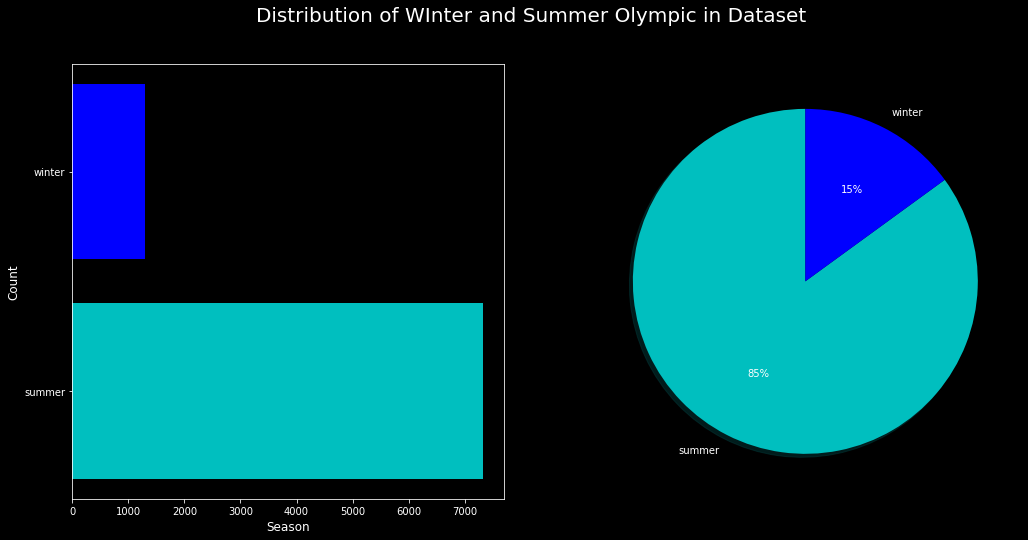

In [26]:
total_cont=df1['season'].value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Season" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0))
fig.suptitle('Distribution of WInter and Summer Olympic in Dataset',).set_size(20)
axs[0].grid(False)


plt.style.use('dark_background')
plt.show()

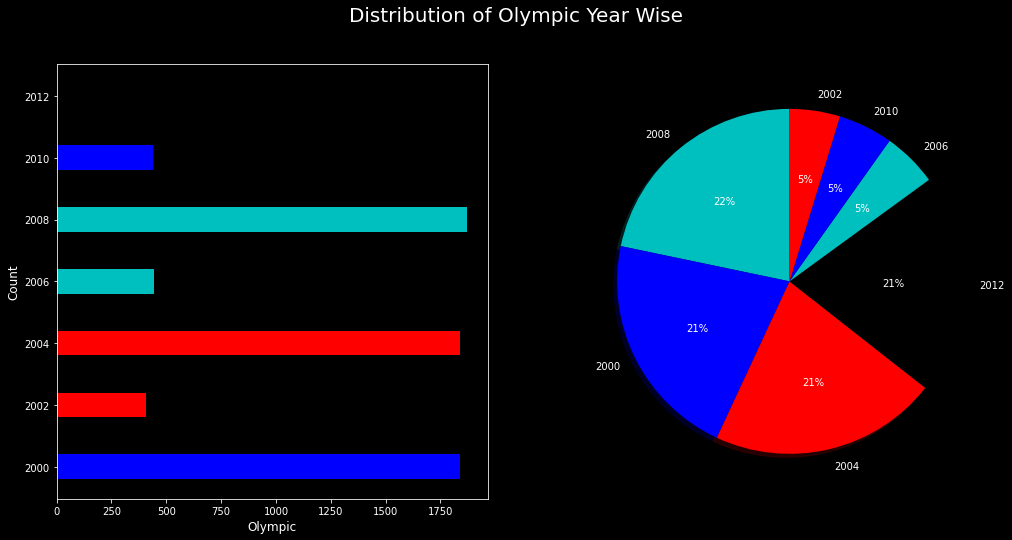

In [27]:
# distribution of player in each olympic
total_cont=df1.year.value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Olympic" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0,0,0,0,0,0,0))
fig.suptitle('Distribution of Olympic Year Wise',).set_size(20)
axs[0].grid(False)

plt.style.use('dark_background')
plt.show()

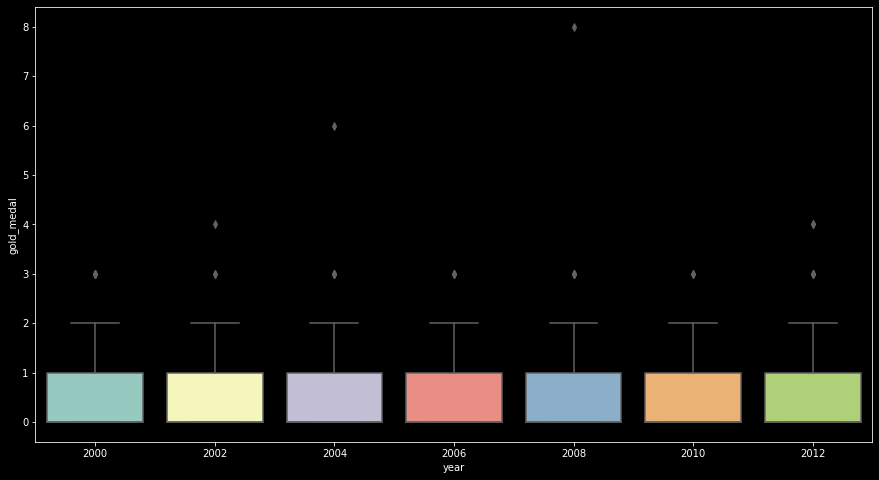

In [28]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(y="gold_medal", x="year", data=df1)
sns.set_style("dark")

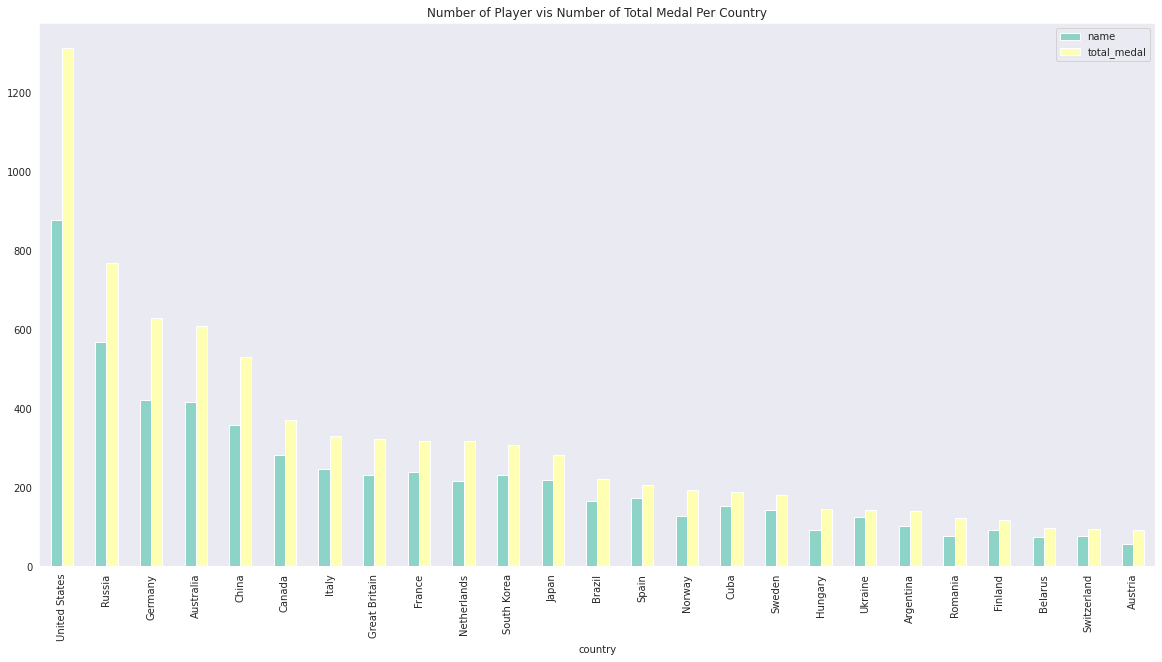

In [29]:
df1.groupby('country').agg({'name':'nunique','total_medal':'sum'}).sort_values(by='total_medal',ascending=False)[:25].plot(kind='bar',figsize=(20,10),title='Number of Player vis Number of Total Medal Per Country')
sns.set_style("dark")

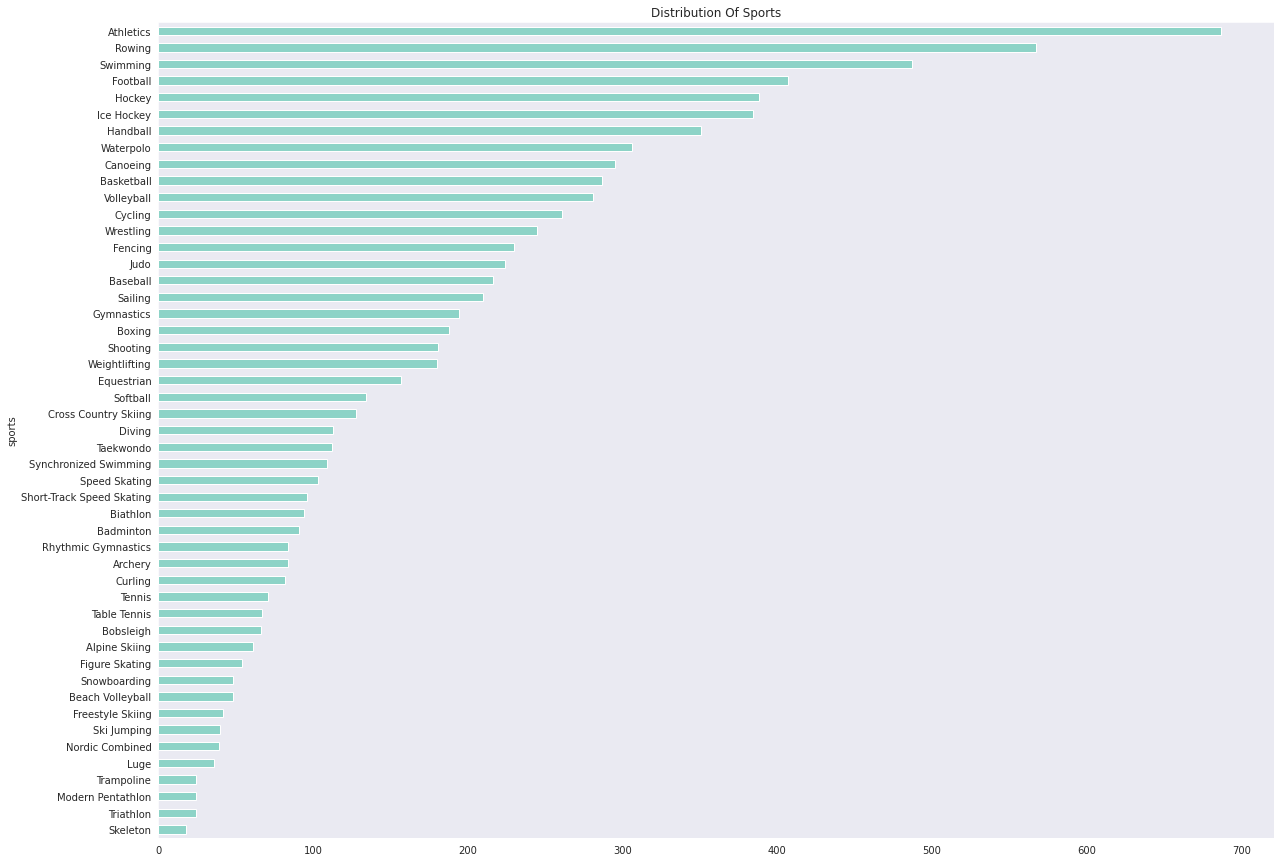

In [30]:
df1.groupby(['sports']).size().sort_values(ascending=True).plot(kind = "barh",figsize=(20, 15),title='Distribution Of Sports')# horizontal bar plot
sns.set_style("dark")

## Please check if the age dataset is skewed or symmetric. Based on the results perform the transformation.

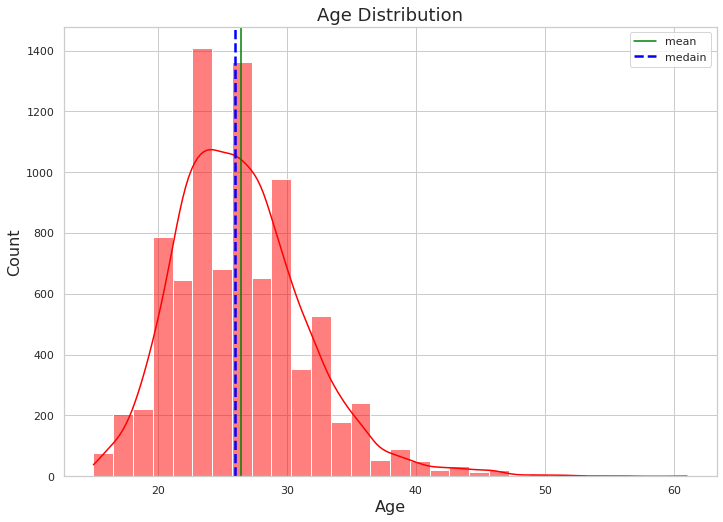

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})# figure size
sns.set_theme(style="whitegrid")
sns.histplot(olympic['age'], kde=True, color='red', bins=30)# histogram plot
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=olympic['age'].mean(),color='green',label='mean')# mean line
plt.axvline(x=olympic['age'].median(),color='blue',ls='--',lw=2.5,label='medain')# medain line
plt.legend();

age data is right skewed.

In [32]:
olympic['age'].skew()# skewnwss

0.8590070668484233

##Observation:

* Summer olympic age attribur age is moderately skewed.Because If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
* Winter olympic age attribur age is fairly symmetrical.Because If the skewness is between -0.5 and 0.5, the data are fairly symmetrical





### Please perform appropriate numerical measures on each column and report them accordingly.

In [33]:
olympic.describe().round(0)# statistical summary of nummerical varriable and rounding of float values to zero

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8613.0,8613.0,8613.0,8613.0,8613.0
mean,26.0,0.0,0.0,0.0,1.0
std,5.0,1.0,1.0,1.0,0.0
min,15.0,0.0,0.0,0.0,1.0
25%,23.0,0.0,0.0,0.0,1.0
50%,26.0,0.0,0.0,0.0,1.0
75%,29.0,1.0,1.0,1.0,1.0
max,61.0,8.0,3.0,3.0,8.0


In [34]:
olympic.describe(include='object')# statistical summary of categorical  varriables

,name,New_name
count,8613,8613
unique,6955,6954
top,Matt Wells,Matt Wells
freq,4,4


### Please list the top 10 countries with the gold medal, then the top10 countries with the silver medal, then the bronze medal and the total medal.

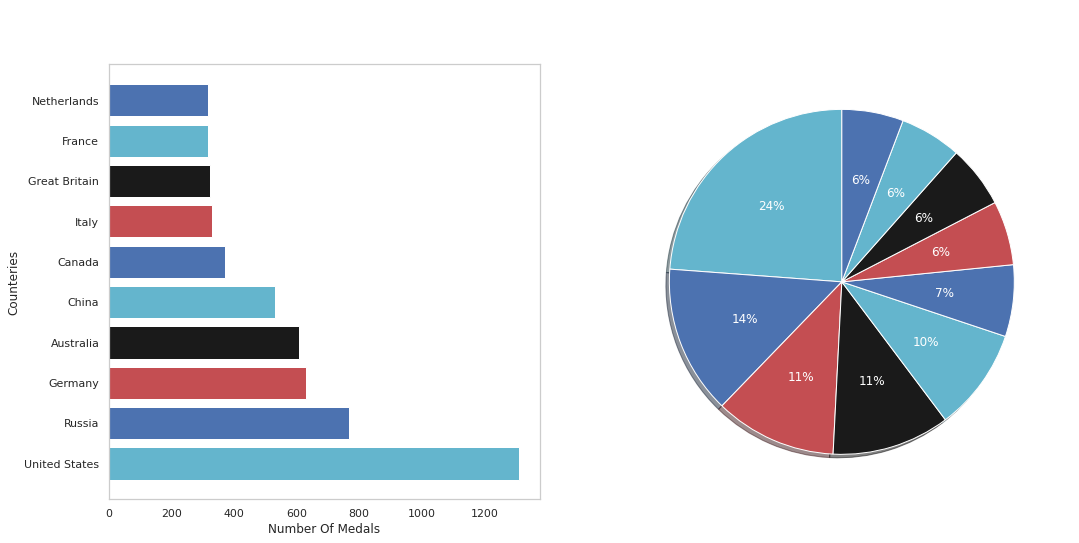

In [35]:
total_cont=olympic.groupby('country')['total_medal'].sum().nlargest(10)# group by country and sum with top 10
label=total_cont.index
values=total_cont.values.flatten()
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Total medal',).set_size(20)# main title
axs[0].grid(False)

plt.style.use('dark_background')# background
plt.show()

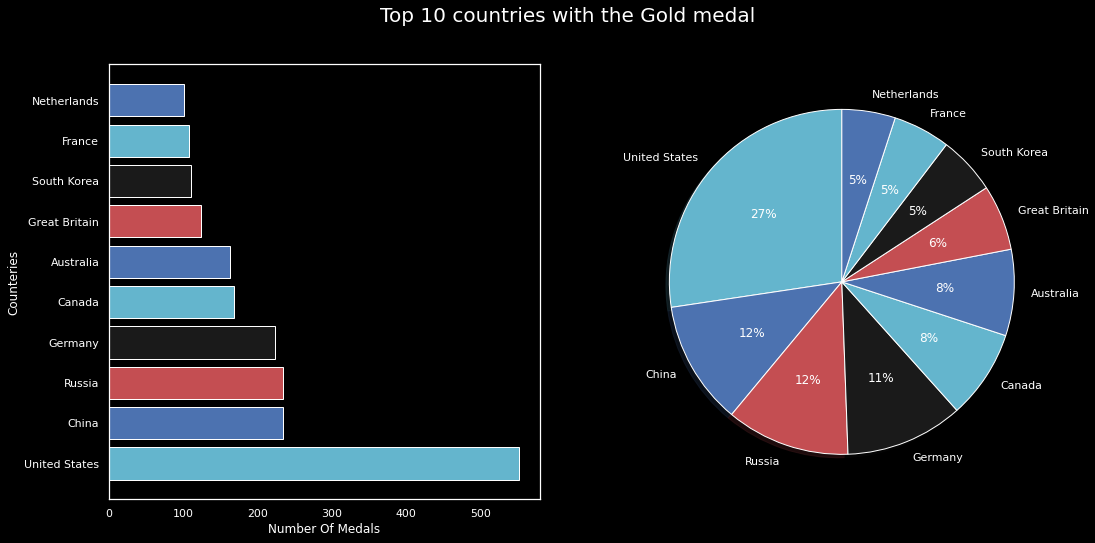

In [36]:
gold_cont=olympic.groupby('country')['gold_medal'].sum().nlargest(10)# group by country and sum with top 10
label=gold_cont.index
values=gold_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')# setting backgorund
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Gold medal',).set_size(20)# title
axs[0].grid(False)

plt.style.use('dark_background')
plt.show()

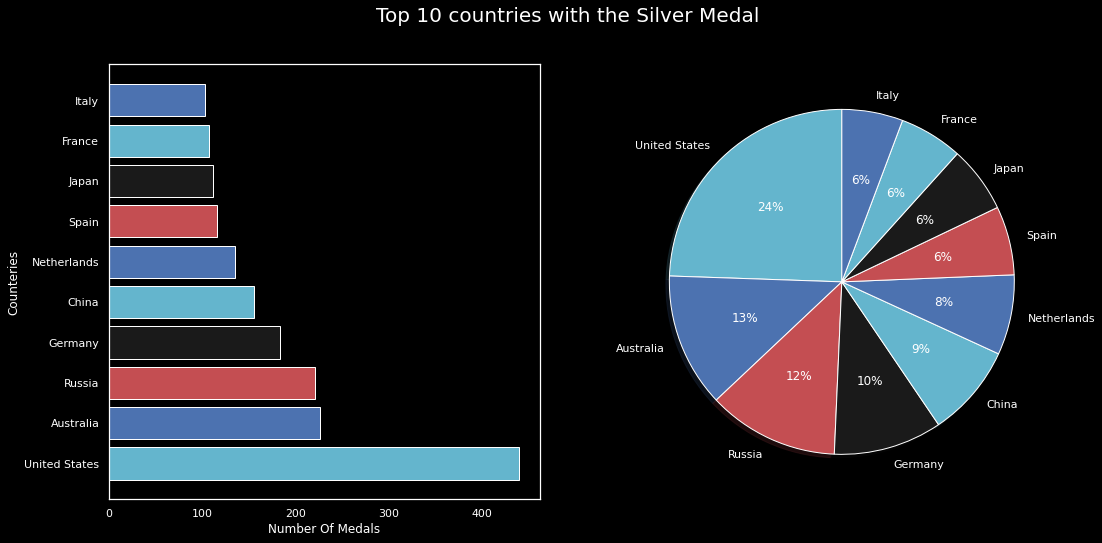

In [37]:
silv_cont=olympic.groupby('country')['silver_medal'].sum().nlargest(10) # group by country and sum with top 10
label=silv_cont.index
values=silv_cont.values.flatten()
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')# setting backgorund
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Silver Medal',).set_size(20)# main title
axs[0].grid(False)

plt.style.use('dark_background')
plt.show()

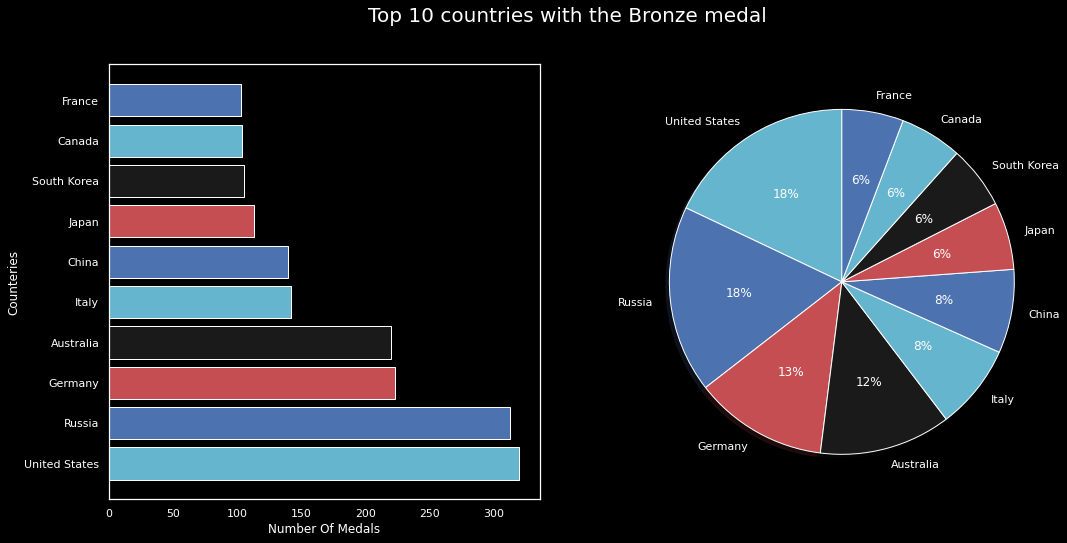

In [38]:
bronze_cont=olympic.groupby('country')['brone_medal'].sum().nlargest(10) # group by country and sum with top 10

label=bronze_cont.index
values=bronze_cont.values.flatten()
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)# horzontal bar plot
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')# setting backgorund
#pie plot
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Bronze medal',).set_size(20)# main title
axs[0].grid(False)

plt.style.use('dark_background')
plt.show()

## **PySpark**

In [39]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=2bca3d847ac351c80a97f735e8618cb5c397915171c4af43d01c8690989d1849
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [40]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import sum, col, desc, asc, count

In [41]:
#Spark Config
spark = SparkSession.builder.appName("practice").getOrCreate()
spark.sparkContext.getConf().getAll();

### Write PySpark code to read the olympix_data.csv *file*

In [42]:
df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympic.csv")
df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012| 8/12/2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000| 10/1/2000|          Gymnastics|         2|           1|          3|     

### Write PySpark code to print the Olympic Sports/games in the dataset.

In [43]:
df.select("sports").distinct().show()

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



### Write PySpark code to plot the total number of medals in  each Olympic Sport/game 

In [ ]:
sport_medal=df.groupBy("sports") \
    .agg(sum("total_medal").alias("Total")) \
    .sort(desc("Total"))

In [ ]:
plot_sport_medal=sport_medal.toPandas()
plot_sport_medal

,sports,Total
0,Swimming,765
1,Athletics,753
2,Rowing,576
3,Football,407
4,Hockey,388
5,Ice Hockey,384
6,Handball,351
7,Canoeing,333
8,Waterpolo,306
9,Cycling,306


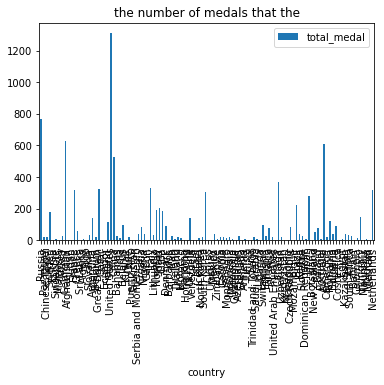

In [ ]:
import matplotlib.pyplot as plot
res = df.groupBy("country").agg({"total_medal":"sum"})
res = res.withColumnRenamed("sum(total_medal)","total_medal")
get_Pandas_DF = res.toPandas() # we can use toPandas() for converting pyspark dataframe to Pandas dataframe
get_Pandas_DF.plot.bar(x="country",y="total_medal",title="the number of medals that the")
plot.show(block=True)

### Sort the result based on the total number of medals.

In [ ]:
df.sort("total_medal","country").show(truncate=False)
df.sort(col("total_medal"),col("country")).show(truncate=False)

+---------------------+----+-----------+----+----------+---------+----------+------------+-----------+-----------+
|name                 |age |country    |year|Date_Given|sports   |gold_medal|silver_medal|brone_medal|total_medal|
+---------------------+----+-----------+----+----------+---------+----------+------------+-----------+-----------+
|Rohullah Nikpai      |25  |Afghanistan|2012|8/12/2012 |Taekwondo|0         |0           |1          |1          |
|Rohullah Nikpai      |21  |Afghanistan|2008|8/24/2008 |Taekwondo|0         |0           |1          |1          |
|Amar Benikhlef       |26  |Algeria    |2008|8/24/2008 |Judo     |0         |1           |0          |1          |
|Mohamed Allalou      |26  |Algeria    |2000|10/1/2000 |Boxing   |0         |0           |1          |1          |
|Taoufik Makhloufi    |24  |Algeria    |2012|8/12/2012 |Athletics|1         |0           |0          |1          |
|Abderrahmane Hammad  |23  |Algeria    |2000|10/1/2000 |Athletics|0         |0  

### Find the total number of medals won by each country in swimming.

In [ ]:
sp_count_TOt=df.groupby('sports','country').agg(sum("total_medal").alias("Total")).sort(desc("Total"))

In [ ]:
sp_count_TOt.filter(sp_count_TOt['sports']=='Swimming').show()

+--------+-------------+-----+
|  sports|      country|Total|
+--------+-------------+-----+
|Swimming|United States|  267|
|Swimming|    Australia|  163|
|Swimming|  Netherlands|   46|
|Swimming|        Japan|   43|
|Swimming|       France|   39|
|Swimming|        China|   35|
|Swimming|      Germany|   32|
|Swimming|       Russia|   20|
|Swimming|        Italy|   16|
|Swimming| South Africa|   11|
|Swimming|Great Britain|   11|
|Swimming|      Hungary|    9|
|Swimming|       Sweden|    9|
|Swimming|       Brazil|    8|
|Swimming|     Zimbabwe|    7|
|Swimming|      Ukraine|    7|
|Swimming|      Romania|    6|
|Swimming|       Canada|    5|
|Swimming|  South Korea|    4|
|Swimming|        Spain|    3|
+--------+-------------+-----+
only showing top 20 rows



###Find the total number of medals won by each country in Skeleton

In [ ]:
sp_count_TOt=df.groupby('sports','country').agg(sum("total_medal").alias("Total")).sort(desc("Total"))

In [ ]:
sp_count_TOt.filter(sp_count_TOt['sports']=='Skeleton').show()

+--------+-------------+-----+
|  sports|      country|Total|
+--------+-------------+-----+
|Skeleton|       Canada|    4|
|Skeleton|United States|    3|
|Skeleton|  Switzerland|    3|
|Skeleton|Great Britain|    3|
|Skeleton|      Germany|    2|
|Skeleton|      Austria|    1|
|Skeleton|       Latvia|    1|
|Skeleton|       Russia|    1|
+--------+-------------+-----+



### Find the number of medals that the US won yearly

In [ ]:
df.filter(df['country']=='United States').groupby('year','country').agg(sum("total_medal").alias("Total")).sort(desc("year")).show()

+----+-------------+-----+
|year|      country|Total|
+----+-------------+-----+
|2012|United States|  254|
|2010|United States|   97|
|2008|United States|  317|
|2006|United States|   52|
|2004|United States|  265|
|2002|United States|   84|
|2000|United States|  243|
+----+-------------+-----+



### Find the total number of medals won by each country.

In [ ]:
df.groupby('country').agg(sum("total_medal").alias("Total")).sort(desc("Total")).show()


+-------------+-----+
|      country|Total|
+-------------+-----+
|United States| 1312|
|       Russia|  768|
|      Germany|  629|
|    Australia|  609|
|        China|  530|
|       Canada|  370|
|        Italy|  331|
|Great Britain|  322|
|       France|  318|
|  Netherlands|  318|
|  South Korea|  308|
|        Japan|  282|
|       Brazil|  221|
|        Spain|  205|
|       Norway|  192|
|         Cuba|  188|
|       Sweden|  181|
|      Hungary|  145|
|      Ukraine|  143|
|    Argentina|  141|
+-------------+-----+
only showing top 20 rows



### Who was the oldest athlete in the olympics?Which country was he/she from? 

In [ ]:
from pyspark.sql import functions as f
old_df = df.groupby("name","country","age").max("age").sort(desc("max(age)")).limit(1)
old_df.select('name','country','age').show()

+----------+-------+---+
|      name|country|age|
+----------+-------+---+
|Ian Millar| Canada| 61|
+----------+-------+---+



# **THANK YOU**